### **Multivariate Analysis (Analysis To More Than Two Columns):**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import adjustText as adt
import ast

In [2]:
orders = pd.read_csv(r"D:\IT Courses\Data Analysis Courses\Data Analysis Projects\International Sales Company Project\International_Sales_Database\Python_Analysis\2_Data_Exploration_Univariate_Analysis\Orders_Dataframe.csv")

orders["orderdate"] = pd.to_datetime(orders["orderdate"])

**Analysis Of Three Variables (Order Date - Country - Total Amount):**

In [3]:
country_date = orders[["orderdate", "country", "totalamount"]].set_index("orderdate")
country_date

,country,totalamount
orderdate,,
2013-08-25,Germany,1086.00
2013-10-03,Germany,878.00
2013-10-13,Germany,330.00
2014-04-09,Germany,960.00
2014-01-15,Germany,851.00
...,...,...
2013-12-23,Poland,399.85
2014-02-04,Poland,160.00
2014-02-25,Poland,427.50


**Re-Sample Of Order Date Column Per Month:**

In [4]:
country_per_month = country_date.resample(rule="1ME").agg(
    country_count=("country","nunique"), 
    total_amount=("totalamount","sum"))

country_per_month

,country_count,total_amount
orderdate,,
2012-07-31,11,30192.10
2012-08-31,11,26609.40
2012-09-30,11,27636.00
2012-10-31,13,41203.60
2012-11-30,11,49704.00
2012-12-31,15,50953.40
2013-01-31,15,66692.80
2013-02-28,14,41207.20
2013-03-31,12,39979.90


In [5]:
country_per_month_name = country_per_month.copy()
country_per_month_name.reset_index(inplace=True)

In [6]:
country_per_month_name["month_year"] = country_per_month_name["orderdate"].dt.strftime("%b %Y")
country_per_month_name

,orderdate,country_count,total_amount,month_year
0,2012-07-31,11,30192.10,Jul 2012
1,2012-08-31,11,26609.40,Aug 2012
2,2012-09-30,11,27636.00,Sep 2012
3,2012-10-31,13,41203.60,Oct 2012
4,2012-11-30,11,49704.00,Nov 2012
5,2012-12-31,15,50953.40,Dec 2012
6,2013-01-31,15,66692.80,Jan 2013
7,2013-02-28,14,41207.20,Feb 2013
8,2013-03-31,12,39979.90,Mar 2013
9,2013-04-30,13,55699.39,Apr 2013


In [7]:
country_per_month_name.drop(columns="orderdate", inplace=True)

In [8]:
country_per_month_name = country_per_month_name.set_index("month_year")
country_per_month_name

,country_count,total_amount
month_year,,
Jul 2012,11,30192.10
Aug 2012,11,26609.40
Sep 2012,11,27636.00
Oct 2012,13,41203.60
Nov 2012,11,49704.00
Dec 2012,15,50953.40
Jan 2013,15,66692.80
Feb 2013,14,41207.20
Mar 2013,12,39979.90


**Scatter Plot:**

**(1) Using Matplotlib Library:**

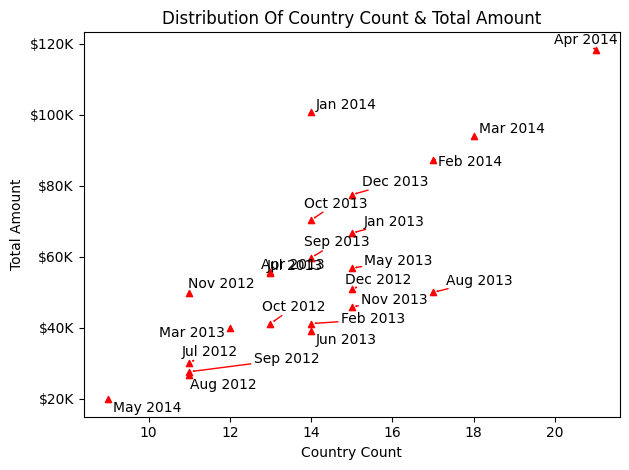

In [12]:
plt.scatter(data=country_per_month_name,
            x="country_count",
            y="total_amount",
            s=20,
            c="red",
            alpha=1,
            marker="^")

texts_list = []

for index, row in country_per_month_name.iterrows():
    texts_list.append(plt.text(row["country_count"], row["total_amount"], index))

ax = plt.gca()
adt.adjust_text(texts=texts_list, arrowprops=dict(arrowstyle="->", color="r", lw=1))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, position: f"${int(y / 1000)}K"))
plt.title("Distribution Of Country Count & Total Amount")
plt.ylabel("Total Amount")
plt.xlabel("Country Count")
plt.tight_layout()

**(2) Using Plotly Library:**

In [10]:
scatter_plot = px.scatter(data_frame=country_per_month,
           x="country_count",
           y="total_amount",
           title="Distribution Of Country Count & Total Amount",
           labels={"country_count":"Country Frequency", "total_amount":"Total Amount In (USD$)"})
scatter_plot.update_layout(title_x=0.5)

**Grouped Bar Chart With Color Intensity Representing a Categorical Variable (Country Frequency):**

In [13]:
px_bar = px.bar(data_frame=country_per_month,
       x=country_per_month.index,
       y=country_per_month["total_amount"],
       title="Distribution Of Country Frequency & Total Amount",
       labels=({"total_amount":"Total Amount", "orderdate":"Month"}),
       text_auto=True,
       color=country_per_month["country_count"]
       )

px_bar.update_layout(title_x=0.5)
px_bar.update_traces(textposition="outside")

**Grouped Bar Chart Analysis:**
1. **Steady Growth Over Time**:  
   The total amount shows a consistent upward trend, with notable increases in early 2013 and a significant peak in early 2014. This suggests sustained growth, possibly driven by business expansion or market penetration.

2. **Correlation Between Total Amount and Country Count**:  
   Bars with lighter colors (higher `country_count`) correspond to higher total amounts. This indicates that broader international participation or engagement correlates with higher revenue or performance metrics.

3. **Notable Spikes in Specific Periods**:  
   Key months such as **January 2013**, **October 2013**, and **January-April 2014** exhibit substantial increases in total amount. These periods could represent seasonal trends, successful campaigns, or key market activities.

4. **Peak Performance in April 2014**:  
   April 2014 recorded the highest total amount (~118.307k), accompanied by a high `country_count`. This suggests a culmination of efforts like marketing drives, new product launches, or expanded geographical outreach.

5. **Enhanced Data Presentation**:  
   The inclusion of annotations with exact amounts on the bars provides clear and precise data interpretation, making it easier to compare monthly performance. The color gradient effectively ties the `country_count` variable to the total amount, adding depth to the analysis.